In [7]:
import zipfile
import os
#C:\ALL folder in dexstop\PycharmProjects\likdin predection
# Path to the uploaded zip file
zip_file_path = r"C:\ALL folder in dexstop\PycharmProjects\likdin predection\linkdin_data.zip"
extracted_dir_path = r"C:\ALL folder in dexstop\PycharmProjects\likdin predection\linkdin_data"


# Create a directory to extract the contents
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List extracted files
extracted_files = os.listdir(extracted_dir_path)
extracted_files

['desktop.ini', 'final_data.csv']

In [1]:
import pandas as pd

# Path to the extracted CSV file
csv_file_path = r'C:\Users\siddh\Downloads\linkdin_data\final_data.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
data.head()


,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        17

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



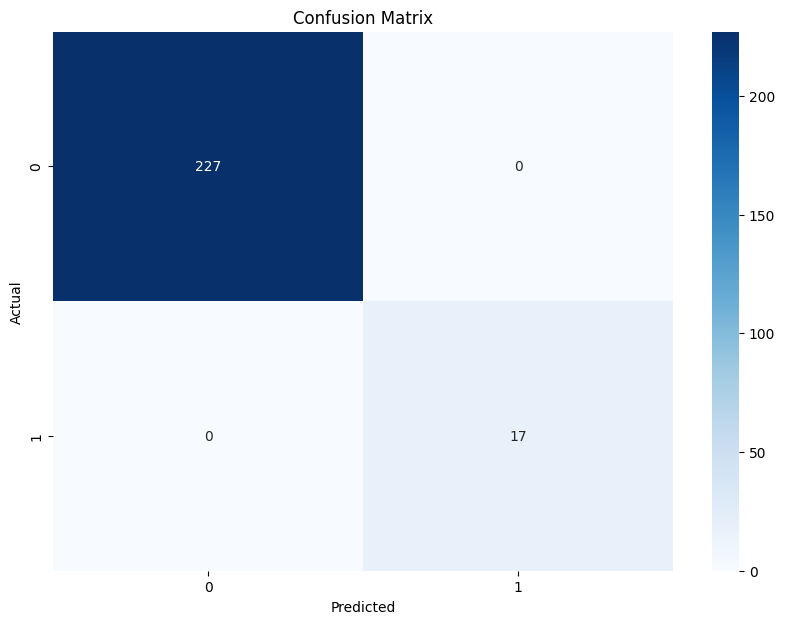

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select the target variable and features
target = 'PYTHON'
features = data.columns[10:]

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


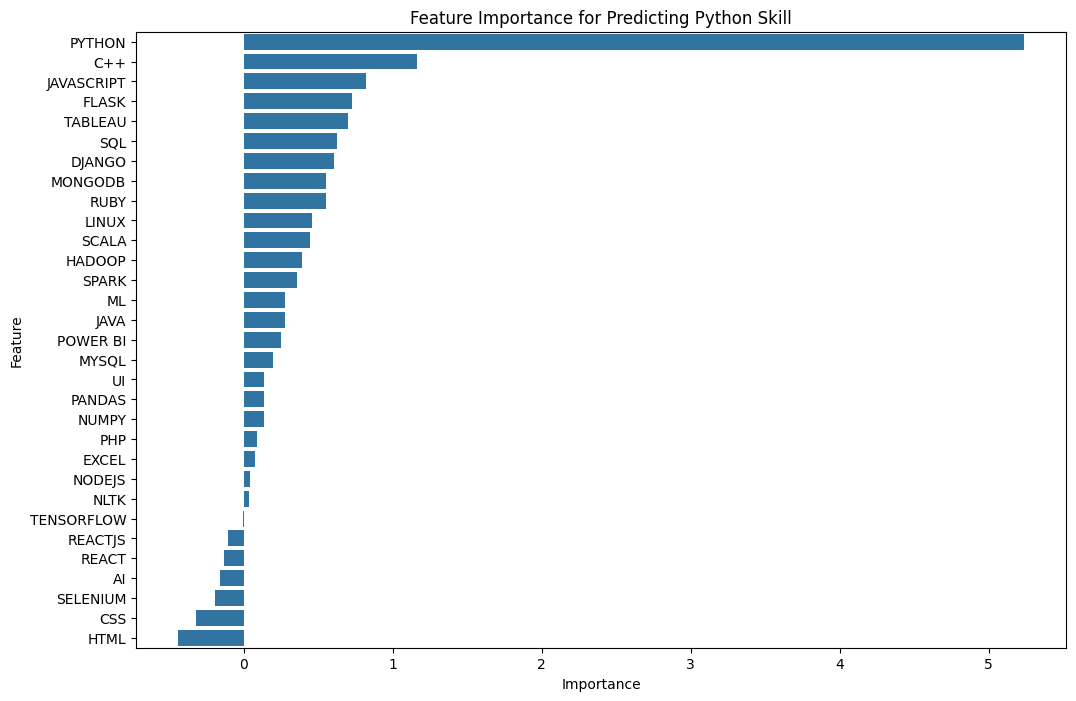

In [31]:
# Extract feature importance
importance = model.coef_[0]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Python Skill')
plt.show()


In [35]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\siddh\Downloads\linkdin_data\final_data.csv'
data = pd.read_csv(file_path)

# Filter the dataset for Wipro job postings
wipro_data = data[data['Company_Name'] == 'Infosys']

# Display the first few rows of the Wipro dataset
print(wipro_data.head())
print(wipro_data.describe())


    Company_Name    Class                Designation     Location  \
793      Infosys  Class 3                 Linux Lead    Karnataka   
794      Infosys  Class 3                Nodejs Lead    Telangana   
795      Infosys  Class 3  Technology Analyst - .Net      Haryana   
796      Infosys  Class 3  Technology Analyst - .Net   Tamil Nadu   
797      Infosys  Class 3           Dotnet Developer       Kerala   

     Total_applicants  LinkedIn_Followers       Level        Involvement  \
793                61             6790011  Full-time    Mid-Senior level   
794                99             6790011  Full-time    Mid-Senior level   
795               191             6790011  Full-time           Associate   
796               144             6790011  Full-time           Associate   
797               170             6790011  Full-time    Mid-Senior level   

     Employee_count                        Industry  ...  REACTJS  AI  UI  \
793           10001   IT Services and IT Consulting

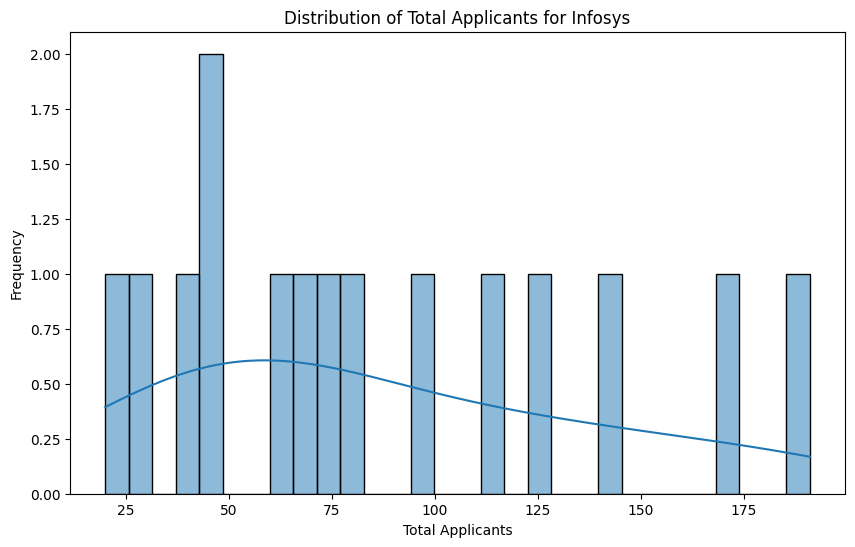

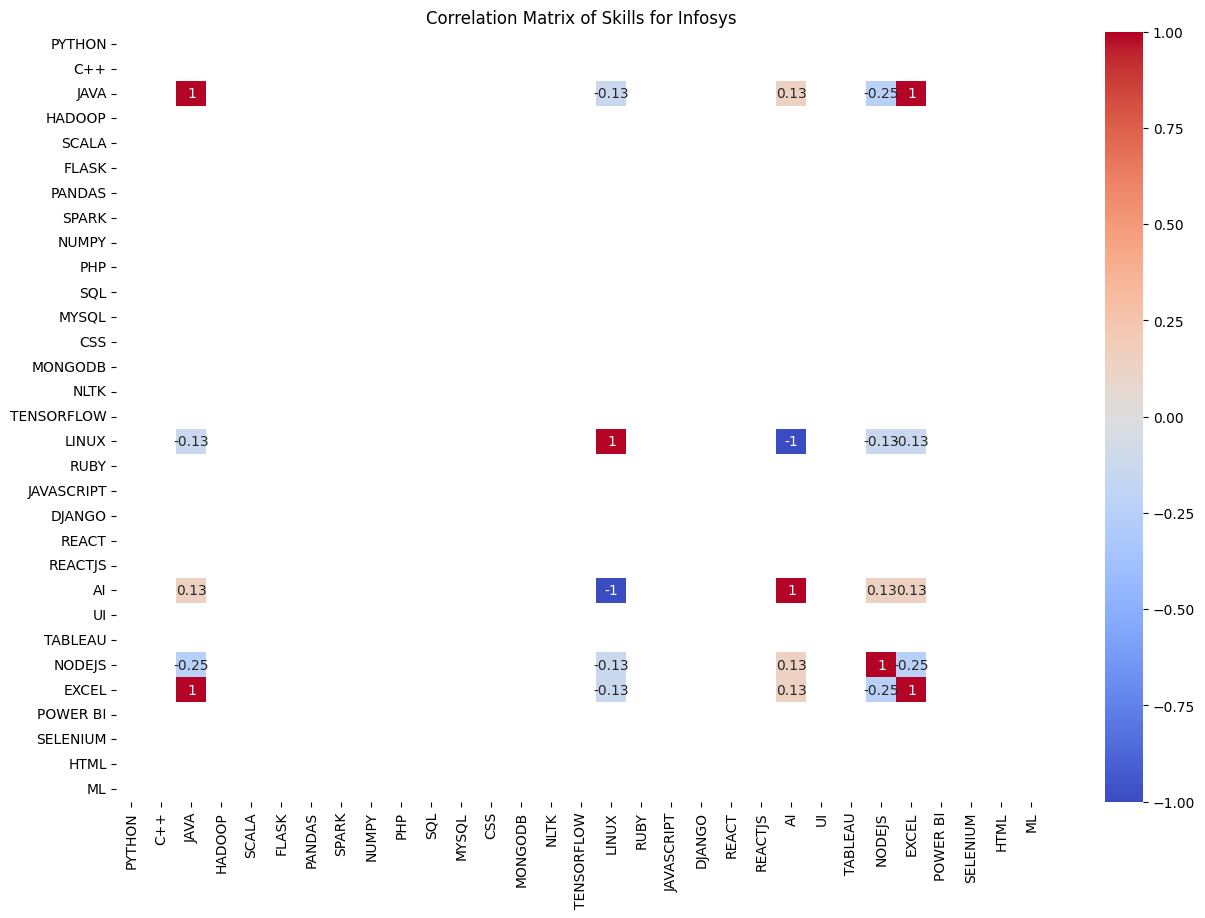

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of total applicants for Wipro
plt.figure(figsize=(10, 6))
sns.histplot(wipro_data['Total_applicants'], bins=30, kde=True)
plt.title('Distribution of Total Applicants for Infosys')
plt.xlabel('Total Applicants')
plt.ylabel('Frequency')
plt.show()

# Plot the correlation matrix for skills
plt.figure(figsize=(15, 10))
sns.heatmap(wipro_data.iloc[:, 10:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Skills for Infosys')
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select the target variable and features
target = 'JAVA'  # You can change this to any skill you want to predict
features = wipro_data.columns[10:]

X = wipro_data[features]
y = wipro_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



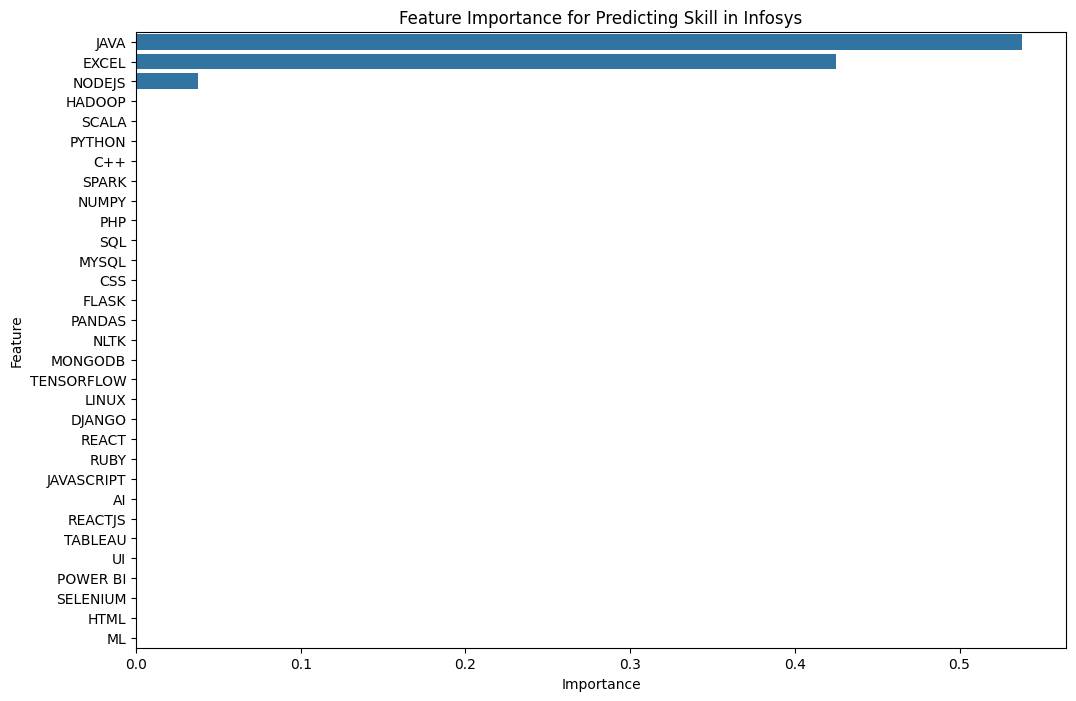

In [42]:
# Feature importance
importance = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Skill in Infosys')
plt.show()
